In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')  # We can ignore any warnings

In [3]:
## Get the dataset

In [5]:
df=pd.read_csv("u.data", sep='\t')

In [7]:
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [8]:
df.shape

(99999, 4)

In [92]:
## Provide column names in the dataset

column_name=["User_id","Item_id","Ratings","Timestamp"]
df=pd.read_csv("u.data", sep="\t", names=column_name)

In [93]:
df.head()

,User_id,Item_id,Ratings,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [94]:
df.shape

(100000, 4)

In [95]:
df['User_id'].nunique()  ## no. of unique users in the dataset

943

In [96]:
df['Item_id'].nunique()  ## no. of unique movies

1682

In [97]:
movie_titles=pd.read_csv("u.item",sep='\|',header=None)


In [98]:
movie_titles=movie_titles[[0,1]]
movie_titles.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [99]:
movie_titles.shape

(1682, 2)

In [100]:
movie_titles.columns=['Item_id','movie_name']

In [101]:
movie_titles.head()

,Item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [102]:
df=pd.merge(df,movie_titles,on="Item_id")

In [103]:
df.head()

,User_id,Item_id,Ratings,Timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [45]:
### Exploratory data analysis

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df.groupby('movie_name')

In [50]:
df.groupby('movie_name').mean()['Ratings']  #Mean ratings received for each movie

In [52]:
df.groupby('movie_name').count()['Ratings'] #count number of ratings given for each movie

In [54]:
mean_ratings=pd.DataFrame(df.groupby('movie_name').mean()['Ratings']) #create a dataframe for mean ratings of each movie

In [55]:
mean_ratings.head()

,Ratings
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [57]:
num_ratings=pd.DataFrame(df.groupby('movie_name').count()['Ratings']) #create a dataframe for no. of ratings of each movie

In [58]:
num_ratings.head()

,Ratings
movie_name,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [68]:
ratings=pd.merge(mean_ratings,num_ratings, on="movie_name") #mege 2 dataframes---for mean and count
ratings.columns=["mean_ratings","number_of_ratings"]

In [69]:
ratings.head()

,mean_ratings,number_of_ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [70]:
## plot a histogram of frequency of "number of ratings"

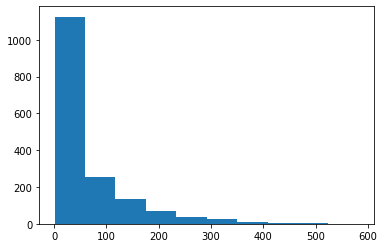

In [73]:
plt.hist(ratings['number_of_ratings'])
plt.show()

In [74]:
plt.figure?

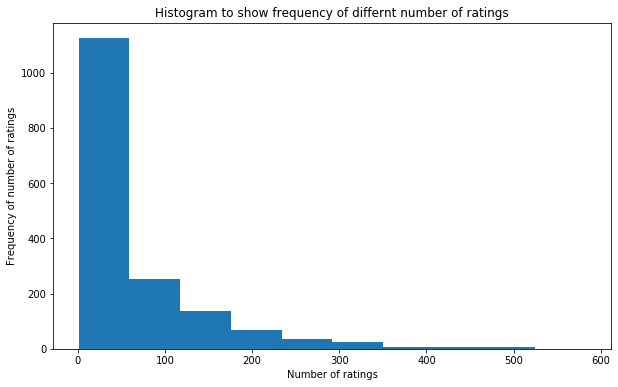

In [77]:
plt.figure(figsize=(10,6))
plt.hist(ratings['number_of_ratings'])
plt.xlabel('Number of ratings')
plt.ylabel('Frequency of number of ratings')
plt.title("Histogram to show frequency of differnt number of ratings")
plt.show()

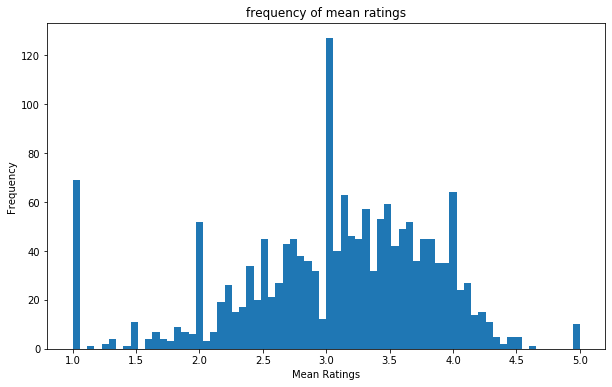

In [81]:
plt.figure(figsize=(10,6))
plt.hist(ratings['mean_ratings'],bins=70)
plt.xlabel('Mean Ratings')
plt.ylabel('Frequency')
plt.title('frequency of mean ratings')
plt.show()

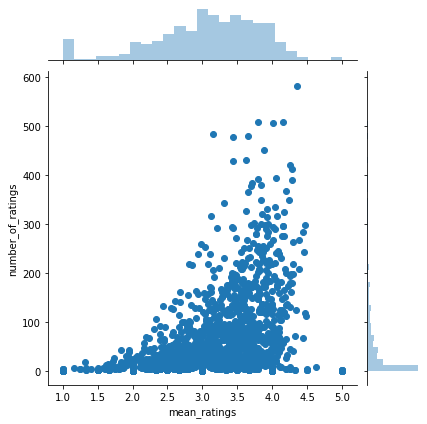

In [89]:
# sns.jointplot?

sns.jointplot(x='mean_ratings',y='number_of_ratings',data=ratings,kind='scatter')


In [90]:
### MOVIE RECOMMENDATION SYSTEM ####

In [104]:
df.head()

,User_id,Item_id,Ratings,Timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [112]:
df.pivot_table(index="User_id",columns="movie_name",values="Ratings") #Create a series of all users' ratings given to all movies

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
movie_mat=pd.DataFrame(df.pivot_table(index="User_id", columns="movie_name", values="Ratings"))
movie_mat.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [113]:
ratings.head()

,mean_ratings,number_of_ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [115]:
## find out movies with most numbers of ratings
ratings=ratings.sort_values('number_of_ratings', ascending=False)
ratings.head()

,mean_ratings,number_of_ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [144]:
starwars_user_ratings=movie_mat['Star Wars (1977)']  #gives all ratings given to star wars movie

In [145]:
starwars_user_ratings.head()

User_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [118]:
### find correlation of star Wars with other movies present in movie_mat

In [146]:
movie_mat.corrwith(starwars_user_ratings)

movie_name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [148]:
starwars_corr=pd.DataFrame(movie_mat.corrwith(starwars_user_ratings),columns=['correlation']) #create a dataframe
starwars_corr.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [149]:
starwars_corr.tail()

,correlation
movie_name,
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182
unknown,0.723123
Á köldum klaka (Cold Fever) (1994),NaN


In [150]:
### we have to remove the NaN values

In [151]:
starwars_corr.dropna(inplace=True)
starwars_corr.tail()

,correlation
movie_name,
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182
unknown,0.723123


In [152]:
## now we have to find movies that are most correlated to star wars (for recommending)

In [159]:
starwars_corr= starwars_corr.sort_values(by='correlation', ascending=False)
starwars_corr

,correlation
movie_name,
Hollow Reed (1996),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
...,...
I Like It Like That (1994),-1.0
Crossfire (1947),-1.0
Two Deaths (1995),-1.0


In [157]:
### find top 20 most correlated movies to starwars

In [160]:
starwars_corr.head(20)

,correlation
movie_name,
Hollow Reed (1996),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
Commandments (1997),1.0
Safe Passage (1994),1.0
Mondo (1996),1.0


In [161]:
### now we want to check number of ratings of each movie

In [162]:
ratings.head()

,mean_ratings,number_of_ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [163]:
# we want to merge "ratings" and "starwars_corr"

In [164]:
starwars_corr=pd.merge(ratings, starwars_corr, on="movie_name")

In [165]:
starwars_corr.head()

,mean_ratings,number_of_ratings,correlation
movie_name,,,
Star Wars (1977),4.358491,583,1.000000
Contact (1997),3.803536,509,0.134962
Fargo (1996),4.155512,508,0.044415
Return of the Jedi (1983),4.007890,507,0.672556
Liar Liar (1997),3.156701,485,0.150292


In [168]:
### select only movies with number of ratings >100
starwars_corr=starwars_corr[starwars_corr['number_of_ratings']>100]

In [172]:
#sort by correlation of movies having num of ratings>100

starwars_corr=starwars_corr.sort_values('correlation',ascending=False)

In [173]:
starwars_corr.head()

,mean_ratings,number_of_ratings,correlation
movie_name,,,
Star Wars (1977),4.358491,583,1.000000
"Empire Strikes Back, The (1980)",4.204360,367,0.747981
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433


In [174]:
## Recommend 10 movies to the users

In [176]:
starwars_corr.head(10)

,mean_ratings,number_of_ratings,correlation
movie_name,,,
Star Wars (1977),4.358491,583,1.000000
"Empire Strikes Back, The (1980)",4.204360,367,0.747981
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433
"Sting, The (1973)",4.058091,241,0.367538
Indiana Jones and the Last Crusade (1989),3.930514,331,0.350107
Pinocchio (1940),3.673267,101,0.347868
"Frighteners, The (1996)",3.234783,115,0.332729


In [177]:
### create a predict function -generalisation for any movies

In [183]:
# def predict_movies(movie):
#     movie_user_ratings=movie_mat[movie_name]
#     similar_to_movie=movie_mat.corrwith(movie_user_ratings)
    
#     corr_movie=pd.DataFrame(similar_to_movie, columns=['correlation'])
#     corr_movie.dropna(inplace=True)
#     corr_movie=corr_movie.join(ratings['number_of_ratings'])
#     corr_movie=corr_movie[corr_movie['number_of_ratings']>100]
#     predictions=corr_movie.sort_values('correlation',ascending=False)
#     return predictions
    